In [2]:
import pandas as pd

## Leyendo CSV

In [3]:
# Leer csv
titanic_dataset = pd.read_csv("./tested.csv")
# Cabecera
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Primeras Gráficas

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

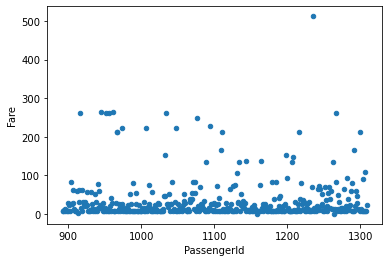

In [4]:
titanic_dataset.plot(kind="scatter", x="PassengerId", y="Fare")

### La limpieza de datos se llama Data Wrengling

In [5]:
#titanic_dataset.plot(kind="bar", x="PassengerId", y="Survived")

titanic_dataset.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

* Graficar los conteos de los sexos (Cuantos eran mujeres y cuantos hombre)  
* Conteo de la edad (Conteo rangos de edad)  
* Conteo de cuántos pobres murieron  


pandas function => dataset.empty() dropna  

documentación  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.empty.html

Contar  
Crear nuevos dataframe  
female, male => Grafica de pastel, barras  
## Limpiar valores que no sirven

Cuántos valores murieron => Sacar la media hacía abajo


# Conteo de sexos

In [8]:
# .dropna devuelve el dataframe sin las filas con valores nulos en un campo especifico
titanic_dataset['Sex'].dropna()

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

Creamos una gráfica de conteo para visualizar el porcentaje de hombre y mujeres que abordaron el titanic

<AxesSubplot:ylabel='Sex'>

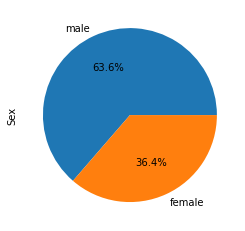

In [28]:
# Cuenta los diferentes elementos que hay dentro de una fila
sex_dataset = titanic_dataset["Sex"].value_counts()
sex_dataset.plot(kind="pie", autopct='%1.1f%%')

## Conteo de la edad de los pasajeros que abordaron el titanic

<AxesSubplot:ylabel='Frequency'>

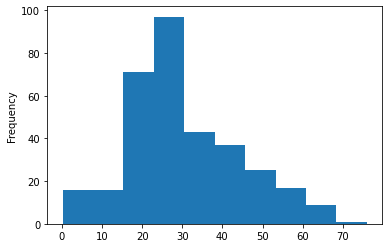

In [41]:
age_dataset = titanic_dataset["Age"].dropna()
age_dataset.value_counts()

age_dataset.plot(kind="hist")

# Cuántas personas con ingreso por debajo de la media murieron

In [79]:
titanic_dataset.head()
titanic_dataset["Survived"].value_counts()

# Obtenemos el promedio de ticket de boleto
titanic_dataset["Fare"].value_counts()
sumatoria_tickets = titanic_dataset["Fare"].sum()
promedio = sumatoria_tickets / titanic_dataset["Fare"].count()
promedio

# Nos quedamos solo con los que murieron
death_dataset = titanic_dataset.drop(titanic_dataset[titanic_dataset["Survived"] == 1].index)

# Eliminamos a las personas que murieron y que tenían un precio de ticket por arriba de la media
poor_dataset = death_dataset[death_dataset['Fare'] <= promedio]
rich_dataset = death_dataset[death_dataset['Fare'] >= promedio]


In [82]:
names = ["Poor Death", "Rich Death"]
values= [poor_dataset["Fare"].count(), rich_dataset["Fare"].count()]